# Bar Charts

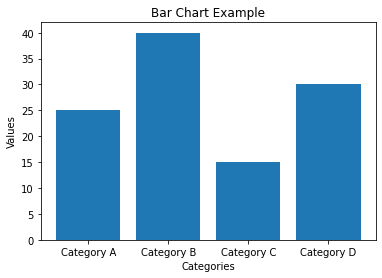

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Creating a pandas DataFrame
data = {
    'Categories': ['Category A', 'Category B', 'Category C', 'Category D'],
    'Values': [25, 40, 15, 30]
}

df = pd.DataFrame(data)

# Step 2: Creating a Bar Chart with matplotlib
plt.bar(df['Categories'], df['Values'])

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart Example')

# Display the plot
plt.show()


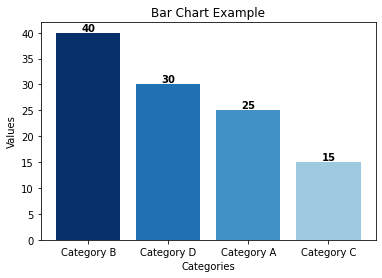

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Creating a pandas DataFrame
data = {
    'Categories': ['Category A', 'Category B', 'Category C', 'Category D'],
    'Values': [25, 40, 15, 30]
}

df = pd.DataFrame(data)

# Step 2: Order the DataFrame by 'Values' column in descending order
df = df.sort_values(by='Values', ascending=False)

# Step 3: Creating a Bar Chart with matplotlib and using dynamic colors
colors = plt.cm.Blues(df['Values'] / float(max(df['Values'])))  # Using "Blues" colormap

plt.bar(df['Categories'], df['Values'], color=colors)

# Adding labels inside the bars
for index, value in enumerate(df['Values']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontweight='bold')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart Example')

# Display the plot
plt.show()


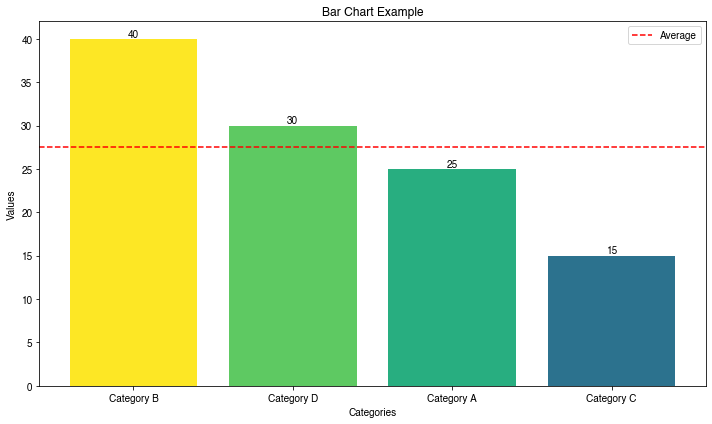

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Step 1: Creating a pandas DataFrame
data = {
    'Categories': ['Category A', 'Category B', 'Category C', 'Category D'],
    'Values': [25, 40, 15, 30]
}

df = pd.DataFrame(data)

# Step 2: Order the DataFrame by 'Values' column in descending order
df = df.sort_values(by='Values', ascending=False)

# Step 3: Setting up Helvetica font
plt.rcParams['font.family'] = 'Helvetica'

# Step 4: Creating a bigger chart
plt.figure(figsize=(10, 6))  # Width: 10 inches, Height: 6 inches

# Step 5: Creating a Bar Chart with matplotlib and using dynamic colors
colors = plt.cm.viridis(df['Values'] / float(max(df['Values'])))  # Using "viridis" colormap

plt.bar(df['Categories'], df['Values'], color=colors)

# Adding labels inside the bars
for index, value in enumerate(df['Values']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Adding a horizontal line for the average
average_value = df['Values'].mean()
plt.axhline(y=average_value, color='red', linestyle='--', label='Average')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart Example')

# Display the plot
plt.legend()  # Show the legend with the "Average" label
plt.tight_layout()  # Ensure all elements fit within the figure
plt.savefig('bar_chart.png', dpi=300)  # Save the chart as a higher resolution image
plt.show()


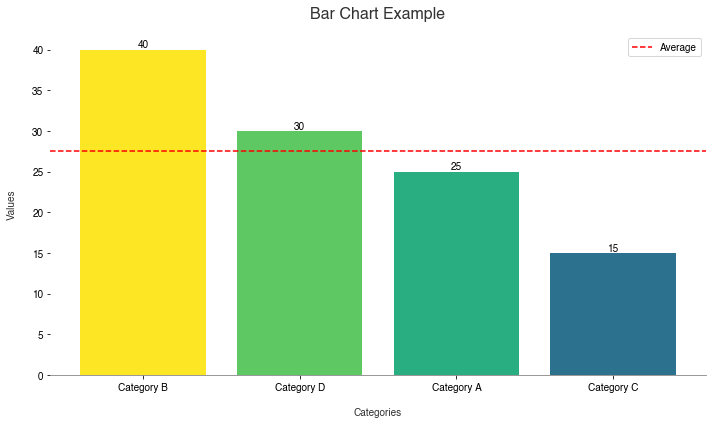

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Step 1: Creating a pandas DataFrame
data = {
    'Categories': ['Category A', 'Category B', 'Category C', 'Category D'],
    'Values': [25, 40, 15, 30]
}

df = pd.DataFrame(data)

# Step 2: Order the DataFrame by 'Values' column in descending order
df = df.sort_values(by='Values', ascending=False)

# Step 3: Setting up Helvetica font
plt.rcParams['font.family'] = 'Helvetica'

# Step 4: Creating a bigger chart
plt.figure(figsize=(10, 6))  # Width: 10 inches, Height: 6 inches

# Step 5: Creating a Bar Chart with matplotlib and using dynamic colors
colors = plt.cm.viridis(df['Values'] / float(max(df['Values'])))  # Using "viridis" colormap

# Removing top, right, and left spines (figure borders)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)



# Making the bottom spine gray
plt.gca().spines['bottom'].set_color('gray')

# Adding a horizontal grid (and keeping vertical grid hidden)


plt.bar(df['Categories'], df['Values'], color=colors)

# Adding labels inside the bars
for index, value in enumerate(df['Values']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Adding a horizontal line for the average
average_value = df['Values'].mean()
plt.axhline(y=average_value, color='red', linestyle='--', label='Average')

# Adding labels and title with bold and bigger title
plt.xlabel('Categories', labelpad=15, color='#333333')
plt.ylabel('Values', labelpad=15, color='#333333')
plt.title('Bar Chart Example', fontweight='bold', fontsize=16, pad=15, color='#333333')

# Display the plot
plt.legend()  # Show the legend with the "Average" label
plt.tight_layout()  # Ensure all elements fit within the figure
plt.savefig('bar_chart.png', dpi=300)  # Save the chart as a higher resolution image
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


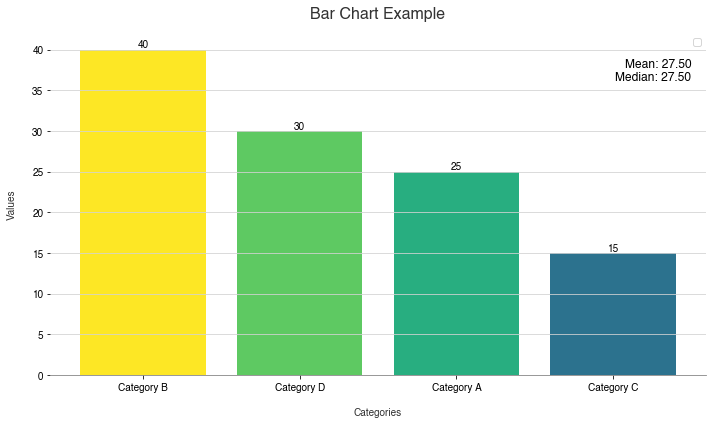

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Step 1: Creating a pandas DataFrame
data = {
    'Categories': ['Category A', 'Category B', 'Category C', 'Category D'],
    'Values': [25, 40, 15, 30]
}

df = pd.DataFrame(data)

# Step 2: Order the DataFrame by 'Values' column in descending order
df = df.sort_values(by='Values', ascending=False)

# Step 3: Setting up Helvetica font
plt.rcParams['font.family'] = 'Helvetica'

# Step 4: Creating a bigger chart
plt.figure(figsize=(10, 6))  # Width: 10 inches, Height: 6 inches

# Step 5: Creating a Bar Chart with matplotlib and using dynamic colors
colors = plt.cm.viridis(df['Values'] / float(max(df['Values'])))  # Using "viridis" colormap

# Removing top, right, and left spines (figure borders)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Making the bottom spine gray
plt.gca().spines['bottom'].set_color('gray')

# Adding a horizontal grid (and keeping vertical grid hidden)
plt.grid(axis='y', color='lightgray')

plt.bar(df['Categories'], df['Values'], color=colors)

# Adding labels inside the bars
for index, value in enumerate(df['Values']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Calculating mean and median
mean_value = df['Values'].mean()
median_value = df['Values'].median()

# Adding mean and median values in the right corner of the chart
text_to_display = f'Mean: {mean_value:.2f}\nMedian: {median_value:.2f}'
plt.text(len(df['Categories'])-0.5, max(df['Values'])-1, text_to_display, ha='right', va='top', fontsize=12)

# Adding labels and title with bold and bigger title
plt.xlabel('Categories', labelpad=15, color='#333333')
plt.ylabel('Values', labelpad=15, color='#333333')
plt.title('Bar Chart Example', fontweight='bold', fontsize=16, pad=15, color='#333333')

# Display the plot
plt.legend()  # Show the legend with the "Average" label
plt.tight_layout()  # Ensure all elements fit within the figure
plt.savefig('bar_chart.png', dpi=300)  # Save the chart as a higher resolution image
plt.show()


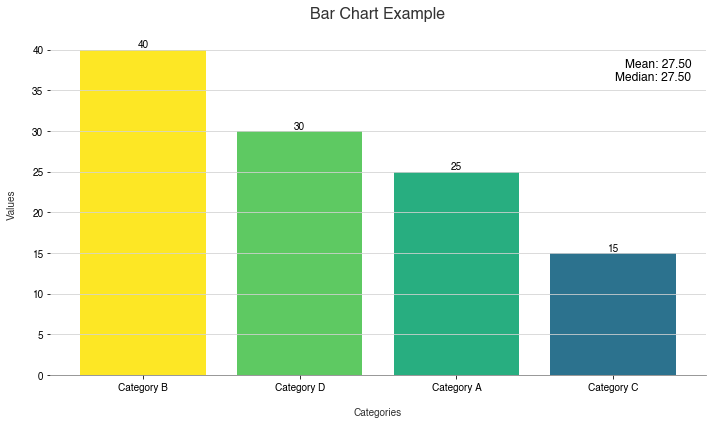

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Step 1: Creating a pandas DataFrame
data = {
    'Categories': ['Category A', 'Category B', 'Category C', 'Category D'],
    'Values': [25, 40, 15, 30]
}

df = pd.DataFrame(data)

# Step 2: Order the DataFrame by 'Values' column in descending order
df = df.sort_values(by='Values', ascending=False)

# Step 3: Setting up Helvetica font
plt.rcParams['font.family'] = 'Helvetica'

# Step 4: Creating a bigger chart
plt.figure(figsize=(10, 6))  # Width: 10 inches, Height: 6 inches

# Step 5: Creating a Bar Chart with matplotlib and using dynamic colors
colors = plt.cm.viridis(df['Values'] / float(max(df['Values'])))  # Using "viridis" colormap

# Removing top, right, and left spines (figure borders)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Making the bottom spine gray
plt.gca().spines['bottom'].set_color('gray')

# Adding a horizontal grid (and keeping vertical grid hidden)
plt.grid(axis='y', color='lightgray')

plt.bar(df['Categories'], df['Values'], color=colors)

# Adding labels inside the bars
for index, value in enumerate(df['Values']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Calculating mean and median
mean_value = df['Values'].mean()
median_value = df['Values'].median()

# Adding mean and median values in the right corner of the chart
text_to_display = f'Mean: {mean_value:.2f}\nMedian: {median_value:.2f}'
plt.text(len(df['Categories'])-0.5, max(df['Values'])-1, text_to_display, ha='right', va='top', fontsize=12)

# Adding labels and title with bold and bigger title
plt.xlabel('Categories', labelpad=15, color='#333333')
plt.ylabel('Values', labelpad=15, color='#333333')
plt.title('Bar Chart Example', fontweight='bold', fontsize=16, pad=15, color='#333333')

# Display the plot
plt.tight_layout()  # Ensure all elements fit within the figure
plt.savefig('bar_chart.png', dpi=300)  # Save the chart as a higher resolution image
plt.show()


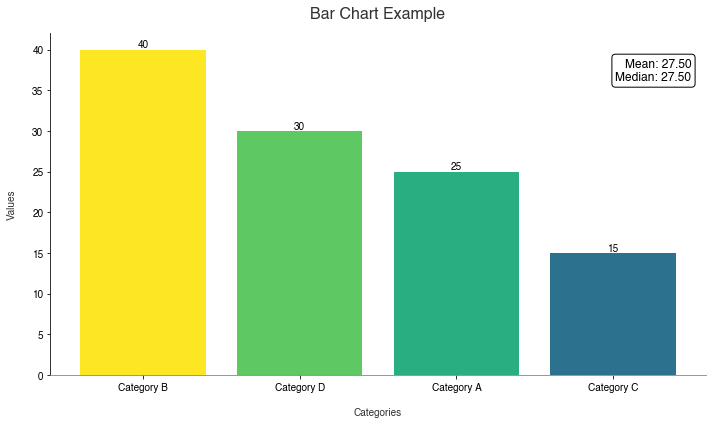

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Step 1: Creating a pandas DataFrame
data = {
    'Categories': ['Category A', 'Category B', 'Category C', 'Category D'],
    'Values': [25, 40, 15, 30]
}

df = pd.DataFrame(data)

# Step 2: Order the DataFrame by 'Values' column in descending order
df = df.sort_values(by='Values', ascending=False)

# Step 3: Setting up Helvetica font
plt.rcParams['font.family'] = 'Helvetica'

# Step 4: Creating a bigger chart
plt.figure(figsize=(10, 6))  # Width: 10 inches, Height: 6 inches

# Step 5: Creating a Bar Chart with matplotlib and using dynamic colors
colors = plt.cm.viridis(df['Values'] / float(max(df['Values'])))  # Using "viridis" colormap

# Removing top, right, and left spines (figure borders)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)

# Making the bottom spine gray
plt.gca().spines['bottom'].set_color('gray')


plt.bar(df['Categories'], df['Values'], color=colors)

# Adding labels inside the bars
for index, value in enumerate(df['Values']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Calculating mean and median
mean_value = df['Values'].mean()
median_value = df['Values'].median()

# Adding mean and median values in the right corner of the chart with frame
text_to_display = f'Mean: {mean_value:.2f}\nMedian: {median_value:.2f}'
plt.text(len(df['Categories'])-0.5, max(df['Values'])-1, text_to_display, 
         ha='right', va='top', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Adding labels and title with bold and bigger title
plt.xlabel('Categories', labelpad=15, color='#333333')
plt.ylabel('Values', labelpad=15, color='#333333')
plt.title('Bar Chart Example', fontweight='bold', fontsize=16, pad=15, color='#333333')

# Display the plot
plt.tight_layout()  # Ensure all elements fit within the figure
plt.savefig('bar_chart.png', dpi=300)  # Save the chart as a higher resolution image
plt.show()
